In [1]:
# Importing pandas and seaborn libraries for data manipulation and charting
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr


In [2]:
# Import data from CSV file
data = pd.read_excel('churn.xlsx')

In [3]:
# Function to clean column names

def column_name_remove_space(data):
    for x in data.columns:
        if " " in x:
            data = data.rename(columns={x:x.replace(" ","_").replace("(","")
                                    .replace(")","").replace(",","_").replace("/","_")})
    return data

In [4]:
# Check for null values
data.isna().any(axis=0).any()

False

In [5]:
# Following columns have categorical data types and they need to be converted to dummy variables
dummy_variable_columns =['GENDER','BILLING_PLATFORM','HAS_FREE_TRIAL','SUBSCRIPTION_PERIOD','BY_CAMPAIGN',
                         'Tablet','SUBSCRIPTION_TYPE','HAS_ANY_KIDS_PROFILE_STREAMING','PRODUCT_SWITCH','IS_RECONNECT_PAID_TO_PAID','IS_RECONNECT_PAID_TO_TRIAL',
                         'IS_RECONNECT_TRIAL_TO_PAID','IS_RECONNECT_TRIAL_TO_TRIAL','STREAM_SPORTS','STREAM_SERIES',
                         'STREAM_MOVIES','PAYMENT_METHOD','PURCHASE_DEVICE_TYPE', 'CHURN']


dummy_data_file_index = 0

In [6]:
#Convertin the predictor variable in a binary numeric variable
data['CHURN'].replace(to_replace='Yes', value=1, inplace=True)
data['CHURN'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(data)
#df_dummies.head()

In [7]:
# We will use the data frame where we had created dummy variables
y = df_dummies['CHURN'].values
X = df_dummies.drop(columns = ['CHURN'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

c:\Users\ciafa001\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.886


In [9]:
#Importances of each variable
importances = model_rf.feature_importances_

sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = df_dummies.columns[1:]
 
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) DISTINCT_TITLES                0.245353
 2) MINS_WATCHED                   0.215875
 3) DAYS_SINCE_LAST_STREAM         0.117975
 4) SUBSCRIPTION_PERIOD_Month-to-month 0.088572
 5) STREAM_SERIES_No               0.068793
 6) STREAM_SERIES_Yes              0.065738
 7) STREAM_SPORTS_No               0.043017
 8) STREAM_SPORTS_Yes              0.039027
 9) SUBSCRIPTION_PERIOD_Two Year   0.028093
10) SUBSCRIPTION_PERIOD_One year   0.021111
11) PRODUCT_SWITCH_Yes             0.011184
12) PRODUCT_SWITCH_No              0.010590
13) SUBSCRIPTION_TYPE_Combo        0.010179
14) SUBSCRIPTION_TYPE_Standalone   0.005372
15) HAS_FREE_TRIAL_No              0.003107
16) HAS_FREE_TRIAL_Yes             0.003049
17) DAYS_STREAM                    0.002688
18) DEVICE_COUNT                   0.002157
19) CHURN                          0.001714
20) IS_RECONNECT_PAID_TO_TRIAL_Yes 0.001499
21) AGE_IN_MONTHS                  0.001496
22) IS_RECONNECT_PAID_TO_TRIAL_No  0.001235
23) NUMB_OF_PROFILES        

Análisis Adicionales

<AxesSubplot:>

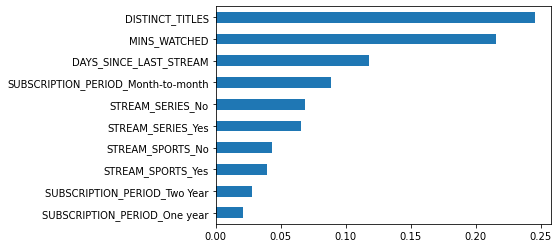

In [10]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

In [11]:
mse = mean_squared_error(y_test, prediction_test)
mse

0.114

In [12]:
test_score = r2_score(y_test, prediction_test)
spearman = spearmanr(y_test, prediction_test)
pearson = pearsonr(y_test, prediction_test)

print(f'Out-of-bag R-2 score estimate: {model_rf.oob_score_:>5.3}')    #QUE CHORINGA ES ESTO!!!!
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

Out-of-bag R-2 score estimate: 0.878
Test data R-2 score: 0.405
Test data Spearman correlation: 0.689
Test data Pearson correlation: 0.689
